One of my first project. Going to make a Stock predictor using AI. The data is from Yahoo and its based on the historical data from OMX 30 Stockholm.

In [4]:
#Installing libaries
!pip3 install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.2/99.8 MB 5.9 MB/s eta 0:00:17
                                              0.6/99.8 MB 7.2 MB/s eta 0:00:14
                                              1.0/99.8 MB 8.1 MB/s eta 0:00:13
                                              1.5/99.8 MB 8.5 MB/s eta 0:00:12
                                              2.0/99.8 MB 9.0 MB/s eta 0:00:11
     -                                        2.5/99.8 MB 9.4 MB/s eta 0:00:11
     -                                        3.0/99.8 MB 9.7 MB/s eta 0:00:10
     -                                        3.5/99.8 MB 9.8 MB/s eta 0:00:10
     -                                        4.1/99.8 MB 10.0 MB/s eta 0:00:10
     -                                        4.8/99.8 MB 10.6 MB/s eta 0:00:09
     --                                       5.5/99.8 MB 10.9 MB/s eta 0:00:09
     --                                       5.8/99.8 M

In [7]:
#Importing libaries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [36]:
#Load data from S&P500
OMXdata = pd.read_csv('C:\\Users\\filip\\Documents\\Code Projects\\Data\\OMX Stockholm.csv')

data = OMXdata.dropna()

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-11-20,594.119995,594.119995,572.469971,587.710022,587.710022,190921000.0
1,2008-11-21,587.710022,594.799988,560.940002,567.609985,567.609985,188222800.0
2,2008-11-24,567.609985,629.229980,567.609985,626.460022,626.460022,197755700.0
3,2008-11-25,626.460022,644.549988,614.369995,634.020020,634.020020,258695400.0
4,2008-11-26,634.020020,638.789978,617.489990,628.859985,628.859985,192007800.0
...,...,...,...,...,...,...,...
3801,2024-01-08,2342.919922,2357.820068,2330.070068,2357.770020,2357.770020,0.0
3802,2024-01-09,2360.889893,2361.719971,2332.790039,2344.719971,2344.719971,0.0
3803,2024-01-10,2341.709961,2347.939941,2335.310059,2341.939941,2341.939941,0.0
3804,2024-01-11,2358.979980,2367.530029,2333.310059,2336.250000,2336.250000,0.0


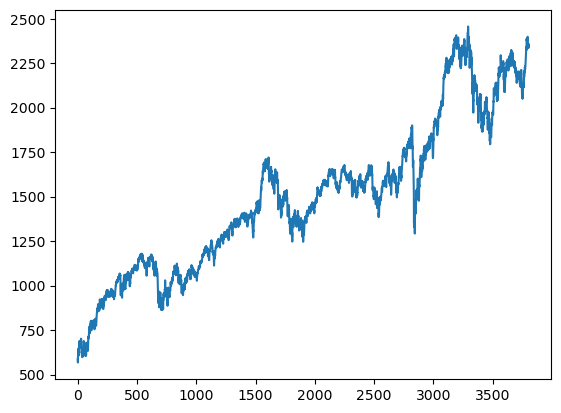

In [37]:
#Plot data
data['Close'].plot()
plt.show()

In [72]:
#Split data into training and testing data sets
train_data = data.iloc[:int(.85*len(data)), :]
test_data = data.iloc[int(.85*len(data)):, :]

In [54]:
#Define features and target variable
features = ['Open', 'Volume']
target = 'Close'

In [73]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[2206.9788 2239.864  2295.5447 2295.5447 2295.5447 2328.5757 2328.5757
 2295.5447 2328.5757 2355.5015 2328.5757 2328.5757 2295.5447 2295.5447
 2295.5447 2295.5447 2295.5447 2328.5757 2328.5757 2328.5757 2328.5757
 2328.5757 2328.5757 2355.5015 2355.5015 2374.7349 2374.7349 2386.4033
 2374.7349 2374.7349 2355.5015 2328.5757 2338.8755 2260.45   2260.45
 2239.3801 2260.45   2260.45   2265.463  2260.45   2295.5447 2328.5757
 2328.5757 2295.5447 2328.5757 2328.5757 2295.5447 2328.5757 2295.5447
 2260.45   2295.5447 2328.5757 2355.5015 2374.7349 2386.4033 2386.4033
 2386.4033 2386.4033 2386.4033 2386.4033 2386.4033 2386.4033 2374.7349
 2386.4033 2386.4033 2374.7349 2358.4673 2355.5015 2295.5447 2328.5757
 2312.7554 2268.6465 2239.864  2260.45   2239.3801 2260.45   2295.5447
 2295.5447 2328.5757 2298.3325 2295.5447 2260.45   2265.463  2295.5447
 2328.5757 2295.5447 2239.3801 2240.427  2266.8499 2260.45   2240.427
 2173.9854 2149.9846 2153.562  2042.3093 2149.9846 2149.9846 

In [75]:
#Show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
3236    2251.010010
3237    2276.949951
3238    2296.770020
3239    2314.979980
3240    2311.699951
           ...     
3801    2357.770020
3802    2344.719971
3803    2341.939941
3804    2336.250000
3805    2355.959961
Name: Close, Length: 570, dtype: float64


In [76]:
#Show the models accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.9542602454324836


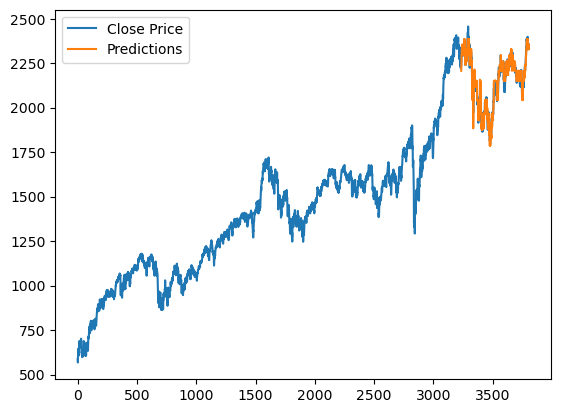

In [77]:
#Plotting the accuracy
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()